# **Introduction to Python (Part 2)¶**

## **2 Create, Manipulate and Summarise Data**
In this section, you will be introduced to some of the basic and commonly used functions in R.This includes generating, importing, exporting, subsetting, summarising and plotting data.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
from google.colab import files #Uncomment if you are using Google Colab
import io
import random
from scipy import stats

---
### **2.1 Generating Numbers and Sequences**

#### **2.1.1 Random Numbers**
**Note:** The numbers show here are likely to be different to what you will have as these are randomly generated numbers.

In [ ]:
# 20 random numbers between 1 and 10 (inclusive)
x1 = np.random.randint(1, 11, size=20)
x1

In [ ]:
# 20 random numbers between 5 and 15 from a Uniform distribution
x2 = np.random.uniform(5, 15, 20)
x2

In [ ]:
# 20 random numbers from a normal distribution with mean=12 and sd=3
x3 = np.random.normal(loc=12, scale=3, size=20)
x3

#### **2.1.2 Sequences and Repeat**

In [ ]:
# A sequence from 1 to 20 with a 0.5 increment
x4 = np.arange(1, 20.5, 0.5)
x4

In [ ]:
# Repeat the sequence {1,2,3,4,5} 5 times over
x5 = np.tile(np.arange(1,6), 5)
x5

In [ ]:
# Repeat each element of the sequence {1,2,3,4,5} by 5 times
x6 = np.repeat(np.arange(1,6), 5)
x6

In [ ]:
# Repeat each element of the sequence {1,2,3,4,5} by 3 times, then repeat that sequence 2 times
x7 = np.tile(np.repeat(np.arange(1,6), 3), 2)
x7

#### **2.1.3 Alphabets**

In [ ]:
# List first 10 letters (lowercase)
import string
list(string.ascii_lowercase[:10])

In [ ]:
# List first 10 letters (UPPERCASE)
list(string.ascii_uppercase[:10])

---
## **2.2 Data Import/Export and Visualization**

1. Direct File Upload (Best for small, temporary datasets) ***- Method 1***

To upload files directly from your local machine, use the files.upload() method from Google Colab’s built-in module. This opens a file picker dialog, allowing you to select CSV, Excel, or other data files. The files are stored temporarily in the Colab runtime and disappear when the session ends.

In [ ]:
# Upload the ElderlyPopWA.csv file
#uploaded = files.upload()
#ElderlyPopWA = pd.read_csv(io.BytesIO(uploaded['ElderlyPopWA.csv']))

3. Use the Dataset from **GitHub. - Method 2**
  
Get the raw file URL and then load directly using this URL.

In [ ]:
url = "https://raw.githubusercontent.com/asim-cv/MAT6206/refs/heads/main/Week1/ElderlyPopWA.csv"
ElderlyPopWA = pd.read_csv(url)
ElderlyPopWA.head() # Show only the head

In [ ]:
# Setting the default display style
pd.reset_option('^display.', silent=True)  # The '^' targets all display options

In [ ]:
# Uncomment the following lines if you want to see all the rows and columns
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
display(ElderlyPopWA) # Using display function to view the data

In [ ]:
# Downloading the Updated Dataset .csv file
files.download('ElderlyPopWA.csv') #Replace the filename with the name of the file you want to download

---
## **2.3 Data Manipulation and Summaries**

In pre-processing of data, we often want to categorise a group of individuals (which may be people, animals or objects) based on certain feature(s). Doing so often makes it easier to analyse the data and interpret the subsequent results.
For example, suppose we wish to categorise the elderly female partipants (from the ElderlyPopWA dataset) into their respective BMI classes. See the following figure.

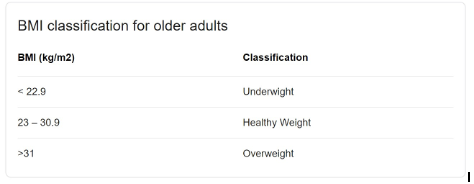

In [ ]:
# Create BMI categories for the elderly female participants
# (Assumes ElderlyPopWA DataFrame is loaded)
mBMI = ElderlyPopWA['BMI'].max()
ElderlyPopWA['BMI_class'] = pd.cut(ElderlyPopWA['BMI'],
     bins=[0,23,31,mBMI],
     labels=['Underweight','Healthy_Weight','Overweight'])
ElderlyPopWA

**Exercise:** Within the sample, how many elderly females are in each of the three BMI classes?

In many instances, we are often interested in having a closer examination of a sub-sample of individuals based on particular group(s) they belong to (e.g. those of a particular gender, ethnicity, income bracket, etc), or by some thresholds (e.g. those who are 35 years old or younger). The following command allows us to perform this task.

In [ ]:
# Subsetting by a categorical variable
Underweight = ElderlyPopWA[ElderlyPopWA['BMI_class']=='Underweight']
Underweight

In [ ]:
# Subsetting by a categorical variable
# Selecting more than one value
Unhealthy_weight = ElderlyPopWA[ElderlyPopWA['BMI_class'].isin(['Underweight','Overweight'])]
Unhealthy_weight

In [ ]:
# Select a subset
# Select those under 75 years of age, and select all columns
Age_LT75 = ElderlyPopWA[ElderlyPopWA['Age'] < 75] 
Age_LT75

In [ ]:
# Select a subset
# Select those under 75 years of age, but select fewer columns only
# use : instead of ['BMI', 'Waist'] incase if all the columns are to be selected
Age_LT75 = ElderlyPopWA.loc[ElderlyPopWA['Age']<75, ['BMI', 'Waist']]; Age_LT75

In [ ]:
# Select a subset by using "~" operator
# Select those that are not under 75 years of age.
Age_GTE75 = ElderlyPopWA[~(ElderlyPopWA['Age'] < 75)] 
Age_GTE75

---
## **2.4	Descriptive Statistics**

Once your dataset is pre-processed and cleaned, then it is a good idea to obtain some summary statistics on the variables to get a sense of how the data are distributed.

### **2.4.1 Summarising Continuous Data**

When describing a continuous variable (e.g. age, weight, height, etc), you should always address three aspects; the (1) centre, (2) spread and (3) shape.

#### Measure the Shape

In [ ]:
ElderlyPopWA['Age'].mean()

In [ ]:
ElderlyPopWA['Age'].median()

#### Measure the Shape

In [ ]:
ElderlyPopWA['Age'].std()

In [ ]:
ElderlyPopWA['Age'].min(), ElderlyPopWA['Age'].max()

In [ ]:
ElderlyPopWA['Age'].quantile([0.25,0.5,0.75])

In [ ]:
np.percentile(ElderlyPopWA['Age'], [0,25,50,75,100])

#### Measure the Spread

Skewness and kurtosis are two commonly used measures of shape. Skewness is a measure of symmetry where,

-	Skewness = 0, distribution is symmetrical;
-	Skewness < 0, distribution is left- or negatively-skewed, i.e. longer left tail;
-	Skewness > 0, distribution is right- or positively-skewed, i.e. longer right tail.

Kurtosis is a measure of “tailness” in a distribution relative to a normal distribution.

-	Kurtosis = 3, tails are that of a normal distribution, i.e. mesokurtic;
-	Kurtosis < 3, tails are comparatively shorter than a normal distribution, i.e. platykurtic 3. Kurtosis > 3, tails are comparatively longer than a normal distribution, i.e. leptokurtic.

To compute these two measures in Python, we require the *SCIPY* package.

In [ ]:
# Skewness and kurtosis (requires scipy.stats)
stats.skew(ElderlyPopWA['Age'])

In [ ]:
# Skewness and kurtosis (requires scipy.stats)
stats.kurtosis(ElderlyPopWA['Age'])

The above values indicate that the variable Age is approximately symmetrically distributed with a slight positive skewness, and is platykurtic.

**Exercise:** Standardised the Age variable (i.e. (x-mean)/sd), add it to the existing data frame (call it z_Age), and summarise it.
There are other functions that allow you to obtain the summary statistics in a more efficient, in particular for large data frames.

#### Column-wise opeations

In [ ]:
# Column means
ElderlyPopWA.iloc[:,1:8].mean()

In [ ]:
# Apply mean column-wise using axis=0, axis=1 implies row-wise
ElderlyPopWA.iloc[:,1:8].apply(np.mean, axis=0)

In [ ]:
# # Apply std column-wise using axis=0, axis=1 implies row-wise
ElderlyPopWA.iloc[:,1:8].apply(np.std, axis=0)

### **2.4.2 Summarising Discrete and Categorical Data**

Frequencies and proportions are more appropriate When describing categorical or ordinal data. The latter is often treated and described like a continuous variable, but this should only be the case if the range of finite values is relatively large; for example, your final grade in the unit (as recorded in the system), which ranges between 0 and 100 and does not include any decimal value. If, say for example, a variable described by a 5-point Likert scale is to be summarised, then frequencies and proportions should be reported.

In [ ]:
# Number of participants in each BMI Class
BMI_freq = ElderlyPopWA['BMI_class'].value_counts(); BMI_freq

In [ ]:
# Proportions of the samples for each BMI Class
BMI_prop = ElderlyPopWA['BMI_class'].value_counts(normalize=True); BMI_prop

In [ ]:
# Create another categorical variable, i.e. age group
ElderlyPopWA['Age_grp'] = pd.cut(ElderlyPopWA['Age'], [0,74.99,100], labels=['<75years','75+years'])
tab = pd.crosstab(ElderlyPopWA['Age_grp'], ElderlyPopWA['BMI_class']); tab

In [ ]:
# Checking the propotion of new variable, age group
tab.div(tab.sum(axis=1), axis=0)  # Proportions by row

In [ ]:
tab.div(tab.sum(axis=0), axis=1)  # Proportions by column

In [ ]:
tab/tab.values.sum()  # Proportions relative to overall sample size

### **2.4.3	Summarising Continuous Data Across Sub-Groups**

In addition to summarising the characteristics or features of a sample as a whole, we often want to summarise and compare the individuals across variaous sub-groups. We can split the data initially and then compute the relevant summary statistics.


In [ ]:
# Summarise waist circumference by BMI class
ElderlyPopWA.groupby('BMI_class', observed=True)['Waist'].mean() # Compute the mean

In [ ]:
ElderlyPopWA.groupby('BMI_class', observed=True)['Waist'].std() # Compute the standard deviation

In [ ]:
# Summarise waist circumference by BMI class and age group
ElderlyPopWA.groupby(['BMI_class','Age_grp'], observed=True)['Waist'].mean() # Compute the mean

In [ ]:
ElderlyPopWA.groupby(['BMI_class','Age_grp'], observed=True)['Waist'].std() # Compute the standard deviation

In [ ]:
# Mean waist circumference by BMI Class, using apply
ElderlyPopWA.groupby('BMI_class', observed=True)['Waist'].apply(np.mean)

In [ ]:
ElderlyPopWA.groupby(['BMI_class','Age_grp'], observed=True)['Waist'].apply(np.mean) #BMI CLass and Age Group

In [ ]:
# Round proportions
np.round(ElderlyPopWA['BMI_class'].value_counts(normalize=True), 3)

In [ ]:
# Chained operations with pandas
ElderlyPopWA['BMI_class'].value_counts(normalize=True).round(3) # Round to 3 dp

---
## **4. Functions in Python**

Functions are used to encapsulate a sequence of commands that need to be executed multiple times, but perhaps under slightly different conditions. Functions allow one to automate common tasks in a more powerful and general way than copy-and-pasting, which can often lead to incidental mistakes (i.e. updating a variable name in one place, but not in another). Further, functions allows a developer to create an interface to the code, and communicate to the user the most important aspects of the code, rather than having to know every detail of the code.

Control structures in Python allows you to control the flow of execution of a series of *Python commands*, and not having run the same set of commands repeatedly. Control structures are typically, though not necessarily, used inside of functions. The inclusion of control structures and functions will often improve the readability of the code.

In this section, you will learn how to write your own function.

To define a function, use **def** followed by the function **name and parentheses ()**:

In [ ]:
# Function definition and usage in Python
def Greeting():
    print("Hello! My name is XXXX")

To call a fucntion, run the function by typing its name with parentheses:

In [ ]:
Greeting() # Calling a function

The next aspect of a basic function in Python is the *function arguments*. These are the options that you can specify to the user that the user may explicity set for the function. The argument list is defined within the brackets of the function(.) directive. Values assigned to an argument list are passed to, and are typically used by the code within the body of a function. Otherwise there is no point in having an argument list.

Suppose we wish to create a function that **adds 3** to any value that we pass into the function and outputs the sum.

Use **return** to send a result back:

In [ ]:
def add3(x):
    return x + 3

In [ ]:
add3(5) # Passing parameters

In [ ]:
add3(10)

In [ ]:
add3(15)

Let’s step it up a bit and create a function that finds the sum, product and ratio between any two values, say x and y. The two values are to be specified by the user.

In [ ]:
def add_mult(x, y):
    sum_xy = x + y
    prod_xy = x * y
    ratio_xy = x / y
    return sum_xy, prod_xy, ratio_xy

Let’s assign the values, 3 and 4 to x and y respectively, and pass them into the function.

In [ ]:
x = 3
y = 4
print(add_mult(x, y))

In [ ]:
add_mult(x=3, y=4)

In [ ]:
add_mult(y=4, x=3)

In [ ]:
add_mult(3, 4)

---
## **5. IF-and-ELSE Statements in Python**

The if-and-else control structures are used to execute a set of commands only when a particular condition is satisfied, and performs the alternate set of commands if the conditions is not met. The else clause is not mandatory, and would apply in intances where no action is taken if the condition is not met.

To start, let’s create an if statement that checks if a given positive integer is odd, and prints a statement that indicates this if it is true. Note that % is modulus operator and != is the not equals to logical operator.

In [ ]:
# If statement: check if x is odd
x = 5
if x % 2 != 0:
    print(f'{x} is an odd integer')

Let’s now extend the above if statement to include else. Suppose now we want the code to print a statement that an positive integer is odd if it is true, otherwise print a statement that the integer is even.

In [ ]:
# If-else statement: check if x is odd or even
x = 10
if x % 2 != 0:
    print(f'{x} is an odd integer')
else:
    print(f'{x} is an even integer')

We can also include multiple conditions in an if-and-else statement by using else if. For example, suppose you wish to know your grade (i.e. N, P, C, D and HD) for a unit based on your final score.

In [ ]:
# Nested if-elif-else for grading
score = 65
if score < 0:
    print('Invalid score!')
elif score < 50:
    print('Your final grade is N.')
elif score < 60:
    print('Your final grade is P.')
elif score < 70:
    print('Your final grade is C.')
elif score < 80:
    print('Your final grade is D.')
elif score <= 100:
    print('Your final grade is HD.')
else:
    print('Invalid score!')

## **6. Loops: FOR loop in Python**

A for loop executes repetitive code statements for a definite number of iterations. Loops are commonly used to iterate over the elements of vectors, columns (or rows for matrices) of data frames and components of lists.

Let’s begin with a loop that repeats itself 10 time over.

In [ ]:
# For loop from 1 to 10
for I in range(1, 11):
    print(I)

The variable I in the for loop acts as a counter that starts at 1, the command(s) (in this instance it is just a print command) within the loop are then executed. I then increases by 1 to be 2, and the commands are executed again. This process continues until I equals to 10. Note that I is just a variable name, and you can quite easily use another name. Furthermore, the count does not necessary have to start at 1.

We often take advantage of the counter and incorporate it into the commands and run them systematically through, say a data frame or list. For example, suppose we want to generate the means for the continous measurements (i.e. columns 2 to 8) in the ElderlyPopWA dataset. We can systematically move from one column to the next and generate their means using a for loop.


In [ ]:
# For loop to print mean of columns 2 to 8 (assumes ElderlyPopWA is loaded)
dat = ElderlyPopWA.copy()
for J in range(1, 8):
    print(dat.iloc[:, J].mean().round(3))

If-and-else statements are often defined within a for loop to control the execution of certain sets of commands. For example, suppose we want to print out all numbers between 1 and 100 that are divisible by 7 only.

In [ ]:
# For loop: print numbers divisible by 7 from 1 to 100
for I in range(1, 101):
    if I % 7 == 0:
        print(I)

If-and-else statements in for loops are often used to break from the loop when a condition is met. For example, suppose we want to print out the first 10 numbers between 500 and 800 that are divisible by 13.

In [ ]:
# For loop: print first 10 numbers divisible by 13 between 500 and 800
count = 0
for I in range(500, 801):
    if I % 13 == 0:
        print(I)
        count += 1
    if count == 10:
        break